# Illuminate LED Controller Example
Zack Phillips, zkphil@berkeley.edu

In [53]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import serial
import illuminate
import time

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## List Available Serial Ports

In [3]:
import serial.tools.list_ports
comlist = serial.tools.list_ports.comports()
connected = []
for element in comlist:
    connected.append(element.device)
print("Connected COM ports: " + str(connected))

Connected COM ports: ['/dev/cu.Bluetooth-Incoming-Port', '/dev/cu.ZacharysAirPods-Wireles-3', '/dev/cu.ZacharysAirPods-Wireles', '/dev/cu.ZacharysAirPods-Wireles-1', '/dev/cu.ZacharysAirPods-Wireles-2', '/dev/cu.ZacharysAirPods-Wireles-4', '/dev/cu.ZacharysAirPods-Wireles-5', '/dev/cu.ZacharysAirPods-Wireles-6', '/dev/cu.ZacharysAirPods-Wireles-7', '/dev/cu.ZacharysAirPods-Wireles-8', '/dev/cu.ZacharysAirPods-Wireles-9', '/dev/cu.usbmodem1845400', '/dev/cu.ZacharysAirPods-Wireles-10']


## Create LED Array Object

In [26]:
# Pick your serial port and copy that string here
serial_port = '/dev/cu.usbmodem1845400'

# Create LED array controller object
led_array = illuminate.LedArrayController(serial_port)

## Display 2D LED Positions (NA coordinates)

<IPython.core.display.Javascript object>


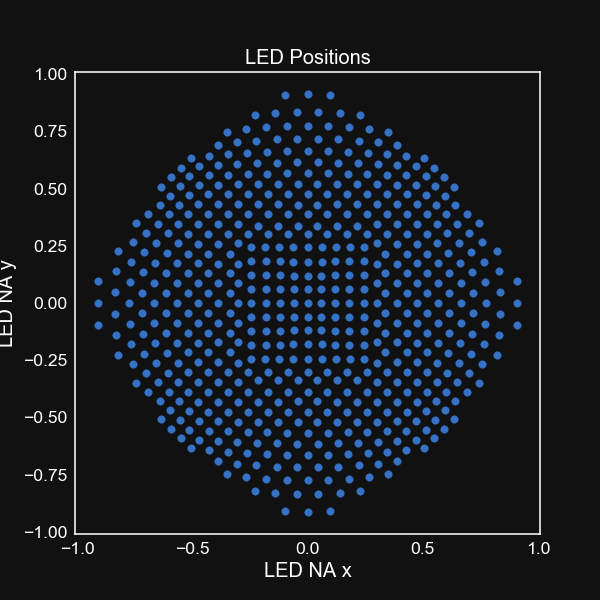

Text(0.5, 1.0, 'LED Positions')

In [48]:
# Get positions from device
source_list_na = np.asarray(led_array.led_positions_na)

# Show LED positions
plt.figure(figsize=(6,6))
plt.scatter(source_list_na[:, 0], source_list_na[:, 1])
plt.xlabel('LED NA x')
plt.ylabel('LED NA y')
plt.title('LED Positions')

## Display 3D LED Positions

<IPython.core.display.Javascript object>


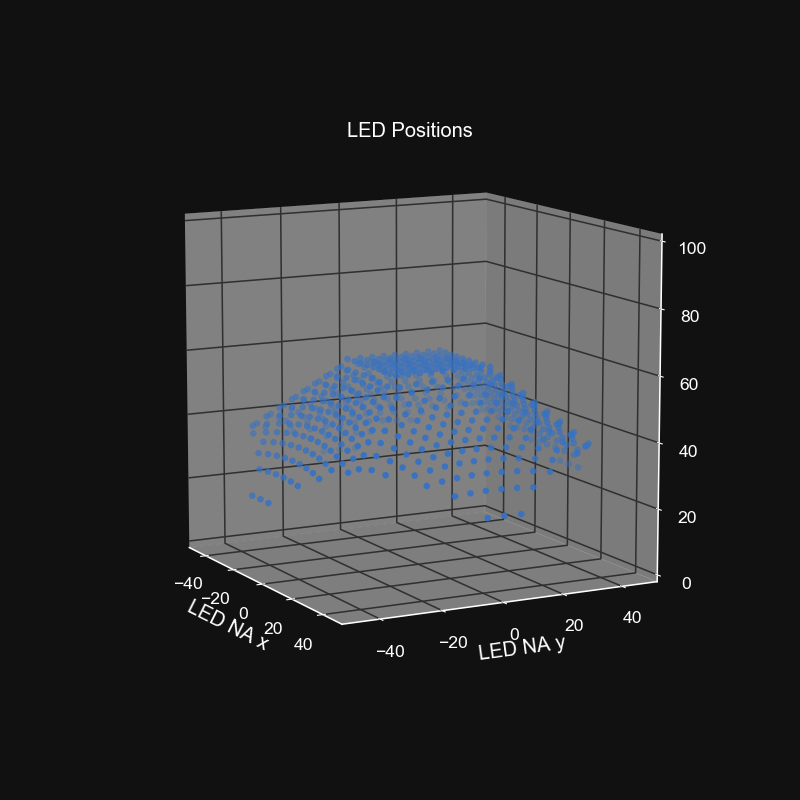

(0, 100)

In [47]:
# Get positions from device
source_list_cart = np.asarray(led_array.led_positions_cart)

# Show LED positions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(source_list_cart[:, 0], source_list_cart[:, 1],source_list_cart[:, 2])
plt.xlabel('LED NA x')
plt.ylabel('LED NA y')
plt.title('LED Positions')
ax.set_xlim((-50, 50))
ax.set_ylim((-50, 50))
ax.set_zlim((0, 100))

## Display brightfield pattern
This pattern respects the array distance ('sad' command) and numerical 
aperature ('na' command).

In [55]:
led_array.command('bf')

'-==-\n'

## Clear the array

In [56]:
led_array.command('x')

'-==-\n'

## Display annular pattern
This pattern respects the array distance ('sad' command) and numerical 
aperature ('na' command).

In [57]:
led_array.command('an')

'-==-\n'

## Display dpc pattern
This pattern respects the array distance ('sad' command) and numerical 
aperature ('na' command). Also see the "rdpc" command

In [58]:
led_array.command('dpc.t')
time.sleep(1)
led_array.command('dpc.b')
time.sleep(1)
led_array.command('dpc.l')
time.sleep(1)
led_array.command('dpc.r')
time.sleep(1)

## Change Colors using hard-coded values

In [59]:
led_array.command('sc.red');
time.sleep(0.1)

led_array.command('bf');
time.sleep(1)

led_array.command('sc.green');
time.sleep(0.1)
led_array.command('bf');
time.sleep(1)

led_array.command('sc.blue');
time.sleep(0.1)
led_array.command('bf');
time.sleep(1)

led_array.command('sc.white');
time.sleep(0.1)
led_array.command('bf');
time.sleep(1)

led_array.command('x')

## Set brightness

In [60]:
led_array.command('sc.green');
time.sleep(0.1)
led_array.command('l.0');
time.sleep(0.5)

led_array.command('sb.10');
time.sleep(0.1)
led_array.command('l.0');
time.sleep(0.5)

led_array.command('sb.64');
time.sleep(0.1)
led_array.command('l.0');
time.sleep(0.5)

led_array.command('sb.128');
time.sleep(0.1)
led_array.command('l.0');
time.sleep(0.5)

led_array.command('sb.255');
time.sleep(0.1)
led_array.command('l.0');
time.sleep(0.5)

## Draw individual LEDs
The syntax to draw LEDs is l.[led#].[led#].[led#].[led#].[led#].

The number of LEDs does not matter. Note that LED numbers start from zero and move outward from the center.

In [61]:
led_array.command('l.0');
time.sleep(1)
led_array.command('l.1');
time.sleep(1)
led_array.command('l.2');
time.sleep(1)
led_array.command('l.0.1.2');
time.sleep(1)
led_array.command('l.51.101.0.20.50.20');
time.sleep(1)

## Draw a color DPC pattern
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0171228

In [62]:
led_array.command('cdpc')

'-==-\n'

## Set numerical aperture (NA)

In [64]:
# Turn down brightness to limit current draw
led_array.command('sb.32');
time.sleep(0.1)

# NA = 0.1
led_array.command('na.10');
time.sleep(0.1)
led_array.command('bf');
time.sleep(0.5)

# NA = 0.25
led_array.command('na.25');
time.sleep(0.1)
led_array.command('bf');
time.sleep(0.5)

# NA = 0.50
led_array.command('na.50');
time.sleep(0.1)
led_array.command('bf');
time.sleep(0.5)

# NA = 0.65
led_array.command('na.65');
time.sleep(0.1)
led_array.command('bf');
time.sleep(0.5)

# NA = 0.80
led_array.command('na.80');
time.sleep(0.1)
led_array.command('bf');
time.sleep(0.5)

## Set LED Array distance
The led array distance is measured from the top edge of the center board
downward to the sample plane.

In [65]:
# Turn down brightness to limit current draw
led_array.command('sb.32');
time.sleep(0.1)
led_array.command('na.40');
time.sleep(0.1)

# dist = 60mm
led_array.command('sad.60');
time.sleep(0.5)
led_array.command('bf');
time.sleep(0.5)

# dist = 50mm
led_array.command('sad.50');
time.sleep(0.5)
led_array.command('bf');
time.sleep(0.5)

# dist = 40mm
led_array.command('sad.40');
time.sleep(0.5)
led_array.command('bf');
time.sleep(0.5)

# dist = 30mm
led_array.command('sad.30');
time.sleep(0.5)
led_array.command('bf');
time.sleep(0.5)

# Reset to 50mm
led_array.command('sad.50');
time.sleep(0.5)

## Run a DPC Sequence
DPC sequences are hard-coded for speed and support hardware triggering
the command format is:
rdpc.[Delay between each pattern in ms].[Number of acquisitions].[trigger mode for index 0].[trigger mode for index 1].[trigger mode for index 2]

The trigger modes are defined as follows:
- mode > 0: Trigger (or wait for a trigger every "mode" frames
- mode == 0: No triggering
- mode == -1: Trigger at the start of each acquisition
- mode == -2: Trigger only once at the begenning of the command

Note that this command can run multiple "Acquisitions" which means it
will run through the full DPC sequence more than once. This is set using
the second command.

Also note that setting the delay (first parameter) to less than ~40ms
will result in the array doing nothing. You will see an error if you
watch the terminal. The exact lower limit will depend on the specific
hardware of your array, as this limit is checked based on feedback from
the hardware (not a hard-coded limit).


In [ ]:
# 2x DPC patterns, updating every 500ms, no triggering
led_array.command('x');
time.sleep(0.5)
led_array.command('rdpc.500.2');
time.sleep(0.5)

# 2x DPC patterns, updating every 500ms, with trigger outputs only (every
# frame
led_array.command('x');
time.sleep(0.5)
led_array.command('rdpc.500.2.1.0.0');
time.sleep(0.5)

# 2x DPC patterns, updating every 500ms, with trigger outputs and inputs 
# (every frame)
led_array.command('x');
time.sleep(0.5)
led_array.command('rdpc.500.2.1.0.1');
time.sleep(0.5)

# The above command may fail if your camera is not configured correcly.
# Check that the trigger ports and camera software are sane if you
# experience trouble.

## Run a FPM Sequence
FPM sequences are hard-coded for speed and support hardware triggering
the command format is:
rdpc.[Delay between each pattern in ms].[Number of acquisitions].[Maximum NA]. [trigger mode for index 0].[trigger mode for index 1].[trigger mode for index 2]

The trigger modes are defined as follows:
- mode > 0: Trigger (or wait for a trigger every "mode" frames
- mode == 0: No triggering
- mode == -1: Trigger at the start of each acquisition
- mode == -2: Trigger only once at the begenning of the command

Note that this command can run multiple "Acquisitions" which means it
will run through the full DPC sequence more than once. This is set using
the second command.

The Maximum NA parameter determines the max NA used for this acquisition.
Note that a NA of 0.25 would result in setting this parameter to "25"

Also note that setting the delay (first parameter) to less than ~40ms
will result in the array doing nothing. You will see an error if you
watch the terminal. The exact lower limit will depend on the specific
hardware of your array, as this limit is checked based on feedback from
the hardware (not a hard-coded limit).

In [ ]:
# 1x FPM patterns, updating every 50ms, 0.50 max NA, no triggering
led_array.command('x');
time.sleep(0.5)
led_array.command('rfpm.50.1.50');
time.sleep(0.5)

# 2x FPM patterns, updating every 50ms, 0.25 max NA, no triggering
led_array.command('x');
time.sleep(0.5)
led_array.command('rfpm.50.2.25');
time.sleep(0.5)

# 2x DPC patterns, updating every 50ms, with trigger outputs only (every
# frame), all LEDs (NA = 1.0 => 100)
led_array.command('x');
time.sleep(0.5)
led_array.command('rfpm.500.2.100.1.0.0');
time.sleep(0.5)

# 2x DPC patterns, updating every 500ms, with trigger outputs and inputs 
# (every frame)
led_array.command('x');
time.sleep(0.5)
led_array.command('rfpm.500.2.100.1.0.1');
time.sleep(0.5)

# The above command may fail if your camera is not configured correcly.
# Check that the trigger ports and camera software are sane if you
# experience trouble.